# Read in Data

In [1]:
import pandas as pd

df = pd.read_csv('kc_house_data_train.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [2]:
#create list of continuous features to look at scatter plots and correlation
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
df[['price', 'date']]

,price,date
0,365000.0,20141006T000000
1,865000.0,20140821T000000
2,1038000.0,20140815T000000
3,1490000.0,20150331T000000
4,711000.0,20140714T000000
...,...,...
17285,750000.0,20150303T000000
17286,440000.0,20140520T000000
17287,310000.0,20140514T000000
17288,427500.0,20141204T000000


In [4]:
df_cont = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
df_cont

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,365000.0,2070,8893,2070,0,47.4388,-122.162,2390,7700
1,865000.0,2900,6730,1830,1070,47.6784,-122.285,2370,6283
2,1038000.0,3770,10893,3770,0,47.5646,-122.129,3710,9685
3,1490000.0,4560,14608,4560,0,47.6995,-122.228,4050,14226
4,711000.0,2550,5376,2550,0,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...
17285,750000.0,3240,9960,2020,1220,47.5858,-122.112,2730,10400
17286,440000.0,1300,4000,1300,0,47.6687,-122.288,1350,4013
17287,310000.0,1050,9876,1050,0,47.7635,-122.262,1760,9403
17288,427500.0,1900,43186,1300,600,47.4199,-121.990,2080,108028


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd472285dc0>,
      dtype=object)

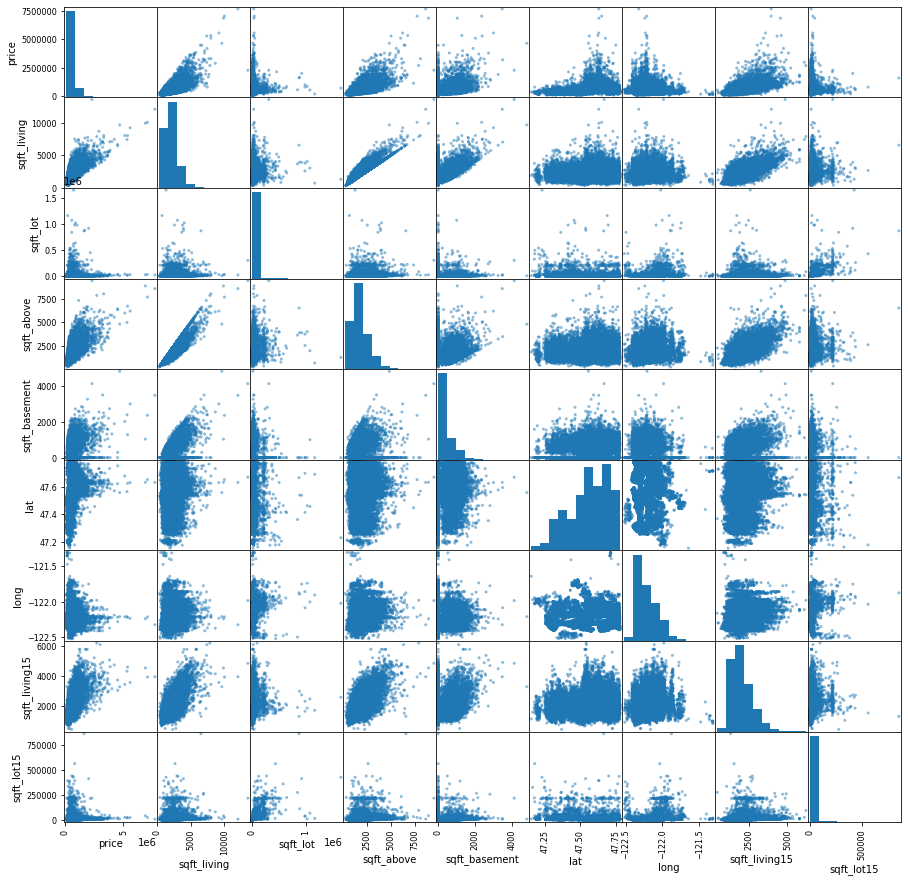

In [5]:
pd.plotting.scatter_matrix(df_cont, figsize = (15,15))


In [6]:
df_cont.corr()


,price,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.703540,0.086803,0.607760,0.323312,0.302394,0.019327,0.585567,0.081423
sqft_living,0.703540,1.000000,0.166810,0.876696,0.435529,0.052646,0.234453,0.755066,0.179570
sqft_lot,0.086803,0.166810,1.000000,0.180755,0.008065,-0.082029,0.226190,0.136959,0.701875
sqft_above,0.607760,0.876696,0.180755,1.000000,-0.051199,0.001374,0.338192,0.731077,0.193874
sqft_basement,0.323312,0.435529,0.008065,-0.051199,1.000000,0.106727,-0.146112,0.199521,0.010007
lat,0.302394,0.052646,-0.082029,0.001374,0.106727,1.000000,-0.131514,0.054175,-0.086265
long,0.019327,0.234453,0.226190,0.338192,-0.146112,-0.131514,1.000000,0.327882,0.253981
sqft_living15,0.585567,0.755066,0.136959,0.731077,0.199521,0.054175,0.327882,1.000000,0.178533
sqft_lot15,0.081423,0.179570,0.701875,0.193874,0.010007,-0.086265,0.253981,0.178533,1.000000


**Some Observations**
1. See strongest relationships between price and sqft_living and sqft_above.
2. Also see possible relationship between price and sqft_living15--might be useable after some manipulation.
3. See strong correlations between sqft_living/sqft_above, sqft_living/sqft_living15, sqft_above/sqft_living15, sqft_lot/sqft_lot15. Be careful/deliberate with how we use these features.


In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

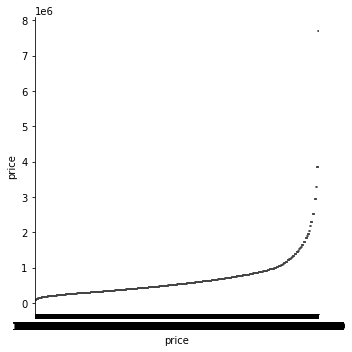

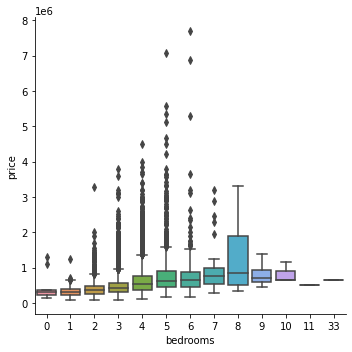

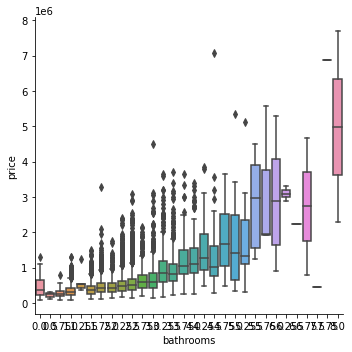

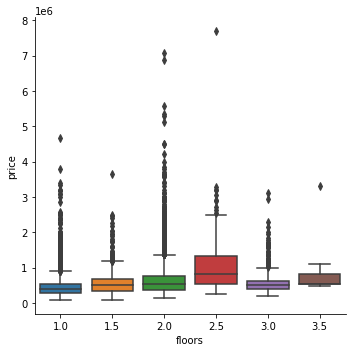

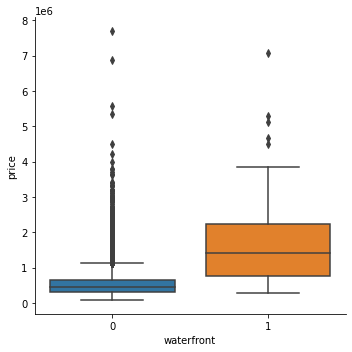

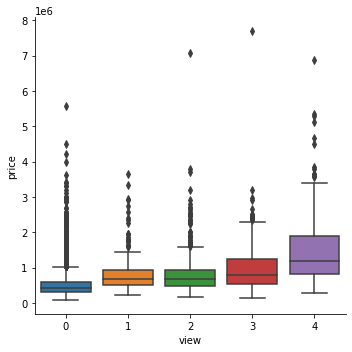

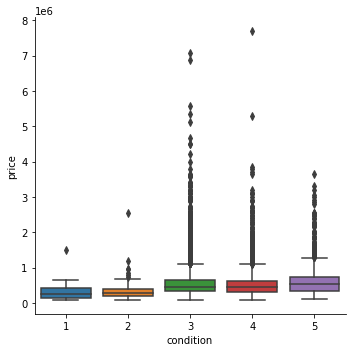

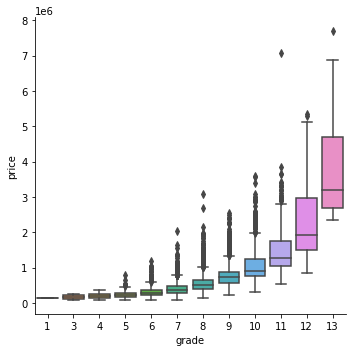

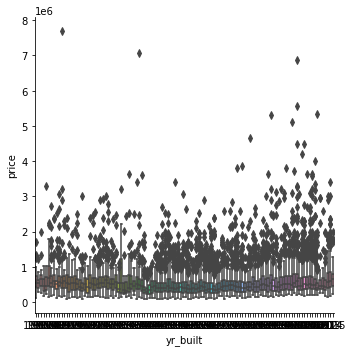

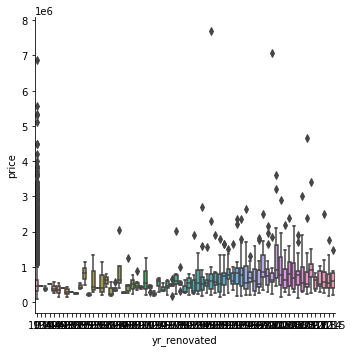

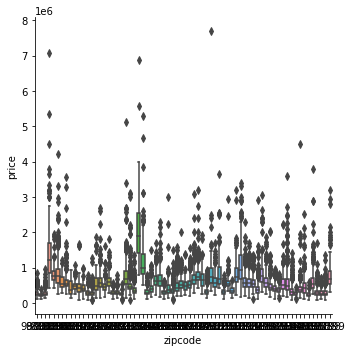

In [9]:
#now look at categorical values via box plots
df_cat = df[['price','bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade',
             'yr_built', 'yr_renovated', 'zipcode',]]

import seaborn as sns

for cat in df_cat.columns:
    sns.catplot(x = cat, y = "price", kind = "box", data = df_cat)



**Observations

1. Number of bedrooms isn't a linear relationship, but by combining with other features hopefully will be useful (will deal with 33-bedroom house in data-cleaning process).
2. Number of bathrooms and grade both look like exponential relationship, hopefully can be useful with some manipulation.
3. Waterfront seems like a good indicator of increased price
4. Zipcode is hard to analyze in this format but will revisit in feature engineering


## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [10]:
#focus on features I expect to use in the model
#sqft_living

df['sqft_living'].describe()

count    17290.000000
mean      2081.464604
std        920.018539
min        290.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

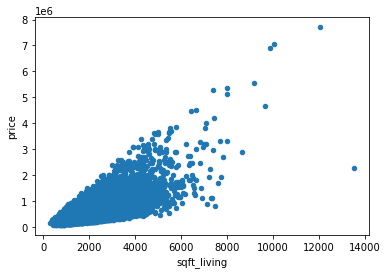

In [11]:
df.plot.scatter('sqft_living', 'price')

In [12]:
#remove one outlier at appx 140,000 sqft
#MAKE SURE NOT TO REMOVE FROM HOLDOUT DATA
df[df['sqft_living']>13000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3275,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


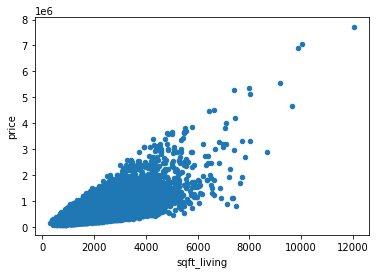

In [13]:
df.drop(3275, axis = 0, inplace = True)
df.plot.scatter('sqft_living', 'price')

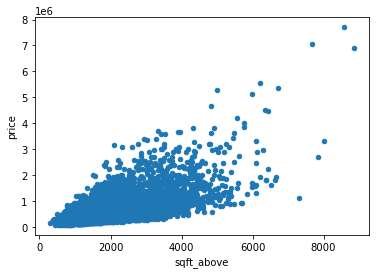

In [14]:
#sqft_above
df.plot.scatter('sqft_above', 'price')

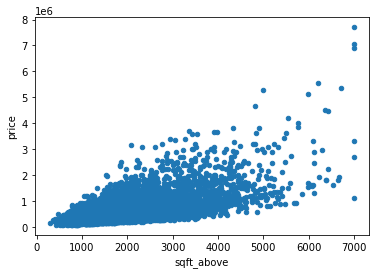

In [15]:
#cap values at 7K sqft, re-look at scatter plot
import numpy as np

df['sqft_above'] = np.where(df['sqft_above'] > 7000, 7000, df['sqft_above'])
df.plot.scatter('sqft_above', 'price')

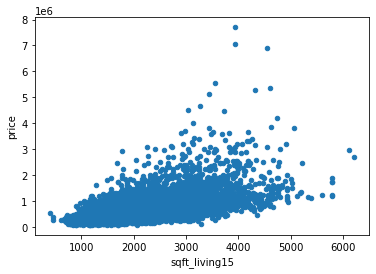

In [16]:
#sqft_living15
df.plot.scatter('sqft_living15', 'price')

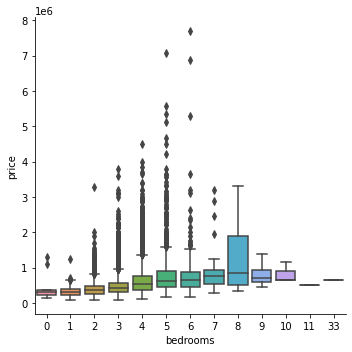

In [17]:
#bedrooms
sns.catplot(x = "bedrooms", y = "price", kind = "box", data = df)


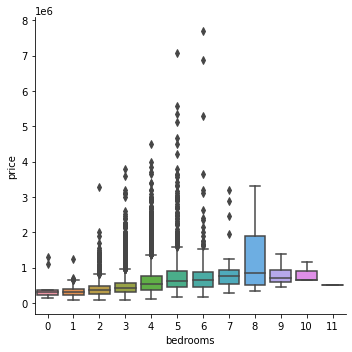

In [18]:
#Google searching tells us that the "33-bedroom" house really has 3 bedrooms--replace
df['bedrooms'] = np.where(df['bedrooms'] > 30, 3, df['bedrooms'])
sns.catplot(x = "bedrooms", y = "price", kind = "box", data = df)


## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

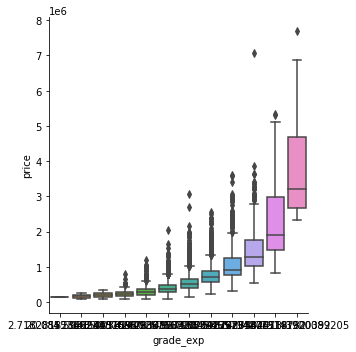

In [19]:
#transform grade into e^grade to make more linear
df['grade_exp'] = np.exp(df['grade'])
sns.catplot(x = "grade_exp", y = "price", kind = "box", data = df)

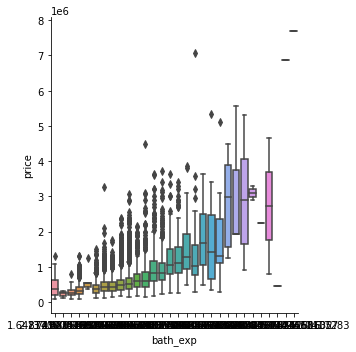

In [20]:
#transform bathrooms into e^bathroom to make more linear
df['bath_exp'] = np.exp(df['bathrooms'])
sns.catplot(x = "bath_exp", y = "price", kind = "box", data = df)

In [21]:
#whether or not the house has a basement
df['basement'] = np.where(df['sqft_basement'] > 0, 1, 0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_exp,bath_exp,basement
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,1986,0,98058,47.4388,-122.162,2390,7700,2980.957987,9.487736,0
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,1977,0,98115,47.6784,-122.285,2370,6283,2980.957987,20.085537,1
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,1997,0,98006,47.5646,-122.129,3710,9685,59874.141715,12.182494,0
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,1990,0,98034,47.6995,-122.228,4050,14226,162754.791419,33.115452,0
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,2004,0,98052,47.6647,-122.083,2250,4050,8103.083928,12.182494,0


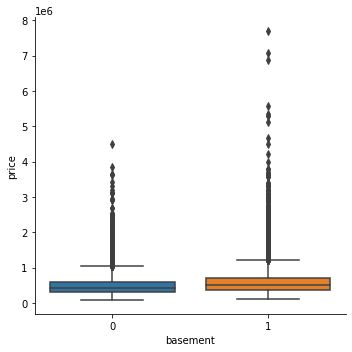

In [22]:
sns.catplot(x = "basement", y = "price", kind = "box", data = df)

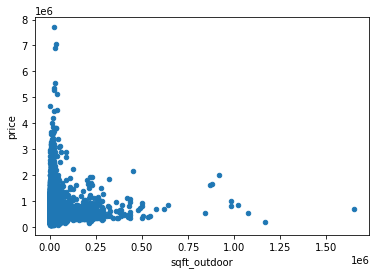

In [23]:
#sqft of outdoor space
df['sqft_outdoor'] = df['sqft_lot'] - (df['sqft_living']/df['floors'])
df.plot.scatter('sqft_outdoor', 'price')

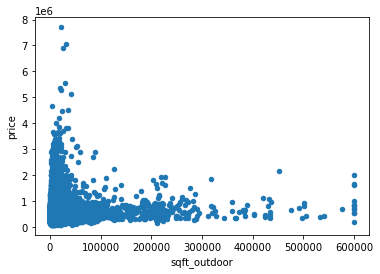

In [24]:
#clean sqft_outdoor--cap at 600K
df['sqft_outdoor'] = np.where(df['sqft_outdoor'] > 600000, 600000, df['sqft_outdoor'])
df.plot.scatter('sqft_outdoor', 'price')

In [25]:
#distance to amazon headquarters
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

amazon = (47.623583541669845, -122.33669143795257)

dist_amazon = []
for row in df.itertuples(index=False):
    dist_amazon.append(haversine_distance(row.lat, row.long, amazon[0], amazon[1]))

df['dist_amazon'] = dist_amazon

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,grade_exp,bath_exp,basement,sqft_outdoor,dist_amazon
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,98058,47.4388,-122.162,2390,7700,2980.957987,9.487736,0,7858.0,24.38
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,98115,47.6784,-122.285,2370,6283,2980.957987,20.085537,1,3830.0,7.22
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,98006,47.5646,-122.129,3710,9685,59874.141715,12.182494,0,9008.0,16.90
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,98034,47.6995,-122.228,4050,14226,162754.791419,33.115452,0,12328.0,11.73
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,98052,47.6647,-122.083,2250,4050,8103.083928,12.182494,0,4101.0,19.55


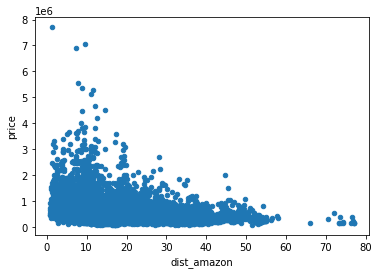

In [26]:
df.plot.scatter('dist_amazon', 'price')

In [27]:
#distance to microsoft headquarters

microsoft = (47.685228949452586, -122.09372667339042)

dist_microsoft = []
for row in df.itertuples(index=False):
    dist_microsoft.append(haversine_distance(row.lat, row.long, microsoft[0], microsoft[1]))

df['dist_microsoft'] = dist_microsoft

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,grade_exp,bath_exp,basement,sqft_outdoor,dist_amazon,dist_microsoft
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,47.4388,-122.162,2390,7700,2980.957987,9.487736,0,7858.0,24.38,27.88
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,47.6784,-122.285,2370,6283,2980.957987,20.085537,1,3830.0,7.22,14.34
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,47.5646,-122.129,3710,9685,59874.141715,12.182494,0,9008.0,16.90,13.67
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,47.6995,-122.228,4050,14226,162754.791419,33.115452,0,12328.0,11.73,10.17
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,47.6647,-122.083,2250,4050,8103.083928,12.182494,0,4101.0,19.55,2.42


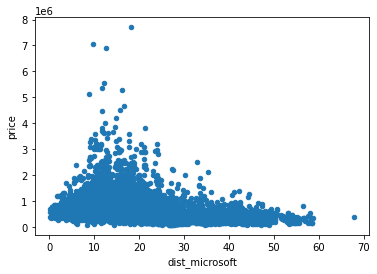

In [28]:
df.plot.scatter('dist_microsoft', 'price')

In [29]:
#feature for Seattle neighborhood (or 'None' if not in Seattle)
df['seattle_neighborhood'] = 'None'
df['seattle_neighborhood'] = np.where(df['zipcode'] == 98133|98177, 'Northwest', df['seattle_neighborhood'])
df['seattle_neighborhood'] = np.where(df['zipcode'] == 98101|98104|98111|98114|98121|98129|98154|98161|98164|98174|98181|98184|98191, 'Downtown', df['seattle_neighborhood'])
df['seattle_neighborhood'] = np.where(df['zipcode'] == 98102|98112, 'Capitol Hill', df['seattle_neighborhood'])
df['seattle_neighborhood'] = np.where(df['zipcode'] == 98103|98103, 'Lake Union', df['seattle_neighborhood'])
df['seattle_neighborhood'] = np.where(df['zipcode'] == 98105|98115|98145|98185|98195, 'Northeast', df['seattle_neighborhood'])
df['seattle_neighborhood'] = np.where(df['zipcode'] == 98106|98106|98126 , 'Delridge', df['seattle_neighborhood'])
df['seattle_neighborhood'] = np.where(df['zipcode'] == 98107|98117, 'Ballard', df['seattle_neighborhood'])
df['seattle_neighborhood'] = np.where(df['zipcode'] == 98108|98124|98134, 'Duwamish', df['seattle_neighborhood'])
df['seattle_neighborhood'] = np.where(df['zipcode'] == 98109|98119|98199, 'Queen Anne/Magnolia', df['seattle_neighborhood'])
df['seattle_neighborhood'] = np.where(df['zipcode'] == 98116|98136|98146, 'Southwest', df['seattle_neighborhood'])
df['seattle_neighborhood'] = np.where(df['zipcode'] == 98118|98144, 'Southeast', df['seattle_neighborhood'])
df['seattle_neighborhood'] = np.where(df['zipcode'] == 98122, 'Central', df['seattle_neighborhood'])
df['seattle_neighborhood'] = np.where(df['zipcode'] == 98125, 'North', df['seattle_neighborhood'])


df['seattle_neighborhood'].value_counts()

None            16063
Lake Union        461
North             321
Central           235
Capitol Hill      209
Name: seattle_neighborhood, dtype: int64

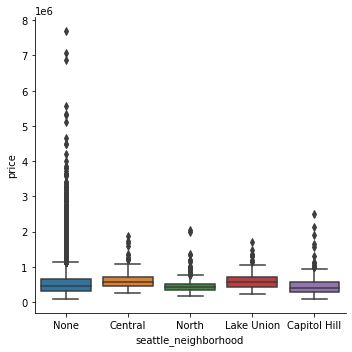

In [30]:
sns.catplot(x = "seattle_neighborhood", y = "price", kind = "box", data = df)


In [31]:
df['date'] = pd.to_datetime(df['date'])

In [32]:
df['month_sold'] = df['date'].dt.month

In [33]:
#Season sold
df['season_sold'] = 'None'
df['season_sold'] = np.where(df['month_sold'] == 9, 'Fall', df['season_sold'])
df['season_sold'] = np.where(df['month_sold'] == 10, 'Fall', df['season_sold'])
df['season_sold'] = np.where(df['month_sold'] == 11, 'Fall', df['season_sold'])
df['season_sold'] = np.where(df['month_sold'] == 12, 'Winter', df['season_sold'])
df['season_sold'] = np.where(df['month_sold'] == 1, 'Winter', df['season_sold'])
df['season_sold'] = np.where(df['month_sold'] == 2, 'Winter', df['season_sold'])
df['season_sold'] = np.where(df['month_sold'] == 3, 'Winter', df['season_sold'])
df['season_sold'] = np.where(df['month_sold'] == 4, 'Spring', df['season_sold'])
df['season_sold'] = np.where(df['month_sold'] == 5, 'Spring', df['season_sold'])
df['season_sold'] = np.where(df['month_sold'] == 6, 'Summer', df['season_sold'])
df['season_sold'] = np.where(df['month_sold'] == 7, 'Summer', df['season_sold'])
df['season_sold'] = np.where(df['month_sold'] == 8, 'Summer', df['season_sold'])


df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,grade_exp,bath_exp,basement,sqft_outdoor,dist_amazon,dist_microsoft,seattle_neighborhood,month_sold,season_sold
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,...,7700,2980.957987,9.487736,0,7858.0,24.38,27.88,None,10,Fall
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,...,6283,2980.957987,20.085537,1,3830.0,7.22,14.34,None,8,Summer
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,...,9685,59874.141715,12.182494,0,9008.0,16.90,13.67,None,8,Summer
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,...,14226,162754.791419,33.115452,0,12328.0,11.73,10.17,None,3,Winter
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,...,4050,8103.083928,12.182494,0,4101.0,19.55,2.42,None,7,Summer


# Statistical testing to confirm what features may be helpful

**1. Waterfront: 2-Sample T-Test**

In [34]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

sample1 = df[df['waterfront'] == 0]
sample2 = df[df['waterfront'] == 1]


#check stds of price between two samples to determine if equal_var is True or False:
print(sample1['price'].std())
print(sample2['price'].std())
print((sample1['price'].std())/(sample2['price'].std()))

#.5-2 ratio count as true

345291.97358847986
1141363.288909664
0.3025259152310171


In [35]:
t, p = ttest_ind(sample1['price'], sample2['price'], equal_var = False)
print(t)
print(p)



-11.904750847794409
6.897602810251047e-23


In [36]:
#Based on the above, we see this is a statistically significant feature

**2. Seattle Neighborhoods: ANOVA**

In [37]:
df['seattle_neighborhood'].value_counts()


None            16063
Lake Union        461
North             321
Central           235
Capitol Hill      209
Name: seattle_neighborhood, dtype: int64

In [38]:
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm


In [39]:
stats.f_oneway(df['price'][df['seattle_neighborhood'] == 'None'],
               df['price'][df['seattle_neighborhood'] == 'Lake Union'], 
               df['price'][df['seattle_neighborhood'] == 'North'],
               df['price'][df['seattle_neighborhood'] == 'Central'],
               df['price'][df['seattle_neighborhood'] == 'Capitol Hill'])

F_onewayResult(statistic=8.504037258563056, pvalue=7.505973329457519e-07)

In [40]:
#Based on the above, we see that this is a statistically significant features

**3. Distance to Amazon's Headquarters: Simple Regression**

In [41]:
from statsmodels.formula.api import ols

slr_model = ols(formula='price~dist_amazon', data=df).fit()
slr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     1715.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:21:23   Log-Likelihood:            -2.4552e+05
No. Observations:               17289   AIC:                         4.911e+05
Df Residuals:                   17287   BIC:                         4.911e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.279e+05   5269.887    138.121      0.000    7.18e+05    7.38e+05
dist_amazon -9932.6230    239.864    -41.409      0.000   -1.04e+04   -9462.465
==============================================================================
Omnibus:                    16461.595   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1335629.526
Skew:                           4.421   Prob(JB):                         0.00
Kurtosis:                      45.141   Cond. No.                         42.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#Althought this feature has a low R-squared value, it also has a p-value of zero,
#which means that it is statistically significant.

# Modeling

In [43]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'grade_exp', 'bath_exp',
       'basement', 'sqft_outdoor', 'dist_amazon', 'dist_microsoft',
       'seattle_neighborhood', 'month_sold', 'season_sold'],
      dtype='object')

### First Model -- quantitative columns

In [57]:
#first model: use all quantitative columns we've identified as potentially useful, create new df of just them
features = ['bedrooms', 'sqft_living', 'waterfront', 'sqft_living15',
            'basement', 'sqft_outdoor', 'dist_amazon', 'dist_microsoft', 'grade_exp', 'bath_exp']

df_features = df[features]


KeyError: "['bedrooms'] not in index"

In [45]:
df_features.dtypes

bedrooms            int64
sqft_living         int64
waterfront          int64
sqft_living15       int64
basement            int64
sqft_outdoor      float64
dist_amazon       float64
dist_microsoft    float64
grade_exp         float64
bath_exp          float64
dtype: object

In [46]:
#train-test-split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, df['price'], random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13831, 10) Target:  (13831,)
Training set - Features:  (3458, 10) Target:  (3458,)


In [47]:

# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

269203.806035681
[-2.24642776e+04  1.86814015e+02  7.19443406e+05  7.86237289e+01
 -1.88202901e+04  4.09222634e-01 -1.07081819e+04 -1.72034964e+03
  4.56153330e+00  1.05432685e+03]


In [48]:
list(zip(features, lm.coef_))

[('bedrooms', -22464.277632257155),
 ('sqft_living', 186.81401520230193),
 ('waterfront', 719443.4055997005),
 ('sqft_living15', 78.62372893337172),
 ('basement', -18820.290104924235),
 ('sqft_outdoor', 0.409222633617983),
 ('dist_amazon', -10708.181892712288),
 ('dist_microsoft', -1720.3496432138486),
 ('grade_exp', 4.561533302826647),
 ('bath_exp', 1054.3268475153518)]

In [49]:
#predict train set
from sklearn import metrics

y_train_pred = lm.predict(X_train)

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 123108.32193273137
Mean Squared Error: 37673635366.1103
Root Mean Squared Error: 194096.97412919733


In [50]:
#predict test set
y_pred = lm.predict(X_test)
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:121528.71884852649
Mean Squared Error:37053136629.22241
Root Mean Squared Error:192491.91315279301


In [51]:
#compare train and test rmses
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))


Training:  194096 vs. Testing:  192491


### Second Model -- add in dummies

In [52]:
#next model: create dummy variables for neighborhoods, bedrooms
df = pd.get_dummies(df, columns=['seattle_neighborhood', 'bedrooms', 'zipcode', 'season_sold'], drop_first=True)



In [53]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 110)
df.head()

,id,date,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,grade_exp,bath_exp,basement,sqft_outdoor,dist_amazon,dist_microsoft,month_sold,seattle_neighborhood_Central,seattle_neighborhood_Lake Union,seattle_neighborhood_None,seattle_neighborhood_North,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,season_sold_Spring,season_sold_Summer,season_sold_Winter
0,2591820310,2014-10-06,365000.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,2980.957987,9.487736,0,7858.0,24.38,27.88,10,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7974200820,2014-08-21,865000.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,2980.957987,20.085537,1,3830.0,7.22,14.34,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,7701450110,2014-08-15,1038000.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,59874.141715,12.182494,0,9008.0,16.90,13.67,8,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9522300010,2015-03-31,1490000.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,162754.791419,33.115452,0,12328.0,11.73,10.17,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9510861140,2014-07-14,711000.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,8103.083928,12.182494,0,4101.0,19.55,2.42,7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [54]:
df.columns

Index(['id', 'date', 'price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition',
       ...
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199', 'season_sold_Spring',
       'season_sold_Summer', 'season_sold_Winter'],
      dtype='object', length=113)

In [58]:
new_features = []
for column in df.columns:
    if 'neighborhood' in column:
        new_features.append(column)
    elif 'bedrooms_' in column:
        new_features.append(column)
    elif 'zipcode_' in column:
        new_features.append(column)
    elif 'season_sold_' in column:
        new_features.append(column)
new_features


['seattle_neighborhood_Central',
 'seattle_neighborhood_Lake Union',
 'seattle_neighborhood_None',
 'seattle_neighborhood_North',
 'bedrooms_1',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bedrooms_10',
 'bedrooms_11',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 

In [59]:
features.extend(new_features)
features.remove('bedrooms')
features

['sqft_living',
 'waterfront',
 'sqft_living15',
 'basement',
 'sqft_outdoor',
 'dist_amazon',
 'dist_microsoft',
 'grade_exp',
 'bath_exp',
 'seattle_neighborhood_Central',
 'seattle_neighborhood_Lake Union',
 'seattle_neighborhood_None',
 'seattle_neighborhood_North',
 'bedrooms_1',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bedrooms_10',
 'bedrooms_11',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zi

In [60]:
df_features = df[features]
df_features.head()

,sqft_living,waterfront,sqft_living15,basement,sqft_outdoor,dist_amazon,dist_microsoft,grade_exp,bath_exp,seattle_neighborhood_Central,seattle_neighborhood_Lake Union,seattle_neighborhood_None,seattle_neighborhood_North,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,season_sold_Spring,season_sold_Summer,season_sold_Winter
0,2070,0,2390,0,7858.0,24.38,27.88,2980.957987,9.487736,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2900,0,2370,1,3830.0,7.22,14.34,2980.957987,20.085537,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3770,0,3710,0,9008.0,16.90,13.67,59874.141715,12.182494,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4560,0,4050,0,12328.0,11.73,10.17,162754.791419,33.115452,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2550,0,2250,0,4101.0,19.55,2.42,8103.083928,12.182494,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [61]:
#run next model using new features
#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, df['price'], random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm_new = linear_model.LinearRegression()

#fit the linear regression to the data
lm_new = lm_new.fit(X_train, y_train)


print(lm_new.intercept_)
print(lm_new.coef_)

#predict train set

y_train_pred = lm_new.predict(X_train)

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

#predict test set
y_pred = lm_new.predict(X_test)
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

#compare train and test rmses
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))


Training set - Features:  (13831, 96) Target:  (13831,)
Training set - Features:  (3458, 96) Target:  (3458,)
25667.490548513422
[ 1.75333031e+02  7.81920605e+05  5.20335165e+01 -2.64137359e+04
  3.63537258e-01 -9.63512991e+03  3.65929684e+03  4.20393092e+00
  1.00193358e+03  5.54802085e+04  6.32347471e+04 -5.16413405e+04
  1.70400562e+04  4.74899283e+04  4.30402826e+04  3.88905983e+04
  1.82734959e+04  6.60046865e+03 -3.10452674e+04 -4.13462478e+04
 -1.48961261e+04 -2.37405804e+05 -3.41724566e+05 -4.28282675e+04
  3.93653973e+04 -1.77558503e+04  7.06534946e+05  2.20909263e+05
  1.94676493e+05  1.97709440e+05  2.42032343e+05  1.37305510e+05
  7.70508001e+04  1.86469320e+05  1.35477672e+05  1.56334464e+05
 -4.06301793e+04  2.28035296e+05  1.48514282e+05  5.74840838e+04
  2.24794836e+05 -2.49228895e+04 -2.49665719e+04 -2.48915641e+04
  2.87129088e+05  1.38817166e+05  4.86038802e+04  1.00408031e+06
  4.08812723e+05  1.79299933e+04  2.38638248e+05  2.14220332e+05
  2.13722333e+05 -3.076664

In [62]:
#this is better than the last model, so will re-name this lm_best
lm_best = lm_new
train_best = train_rmse
test_best = test_rmse

In [63]:
#add polnomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_data = poly.fit_transform(df[features])

poly_columns = poly.get_feature_names(features)

df_poly = pd.DataFrame(poly_data, columns=poly_columns)

df_poly.head()

,sqft_living,waterfront,sqft_living15,basement,sqft_outdoor,dist_amazon,dist_microsoft,grade_exp,bath_exp,seattle_neighborhood_Central,seattle_neighborhood_Lake Union,seattle_neighborhood_None,seattle_neighborhood_North,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,...,zipcode_98166 zipcode_98198,zipcode_98166 zipcode_98199,zipcode_98166 season_sold_Spring,zipcode_98166 season_sold_Summer,zipcode_98166 season_sold_Winter,zipcode_98168^2,zipcode_98168 zipcode_98177,zipcode_98168 zipcode_98178,zipcode_98168 zipcode_98188,zipcode_98168 zipcode_98198,zipcode_98168 zipcode_98199,zipcode_98168 season_sold_Spring,zipcode_98168 season_sold_Summer,zipcode_98168 season_sold_Winter,zipcode_98177^2,zipcode_98177 zipcode_98178,zipcode_98177 zipcode_98188,zipcode_98177 zipcode_98198,zipcode_98177 zipcode_98199,zipcode_98177 season_sold_Spring,zipcode_98177 season_sold_Summer,zipcode_98177 season_sold_Winter,zipcode_98178^2,zipcode_98178 zipcode_98188,zipcode_98178 zipcode_98198,zipcode_98178 zipcode_98199,zipcode_98178 season_sold_Spring,zipcode_98178 season_sold_Summer,zipcode_98178 season_sold_Winter,zipcode_98188^2,zipcode_98188 zipcode_98198,zipcode_98188 zipcode_98199,zipcode_98188 season_sold_Spring,zipcode_98188 season_sold_Summer,zipcode_98188 season_sold_Winter,zipcode_98198^2,zipcode_98198 zipcode_98199,zipcode_98198 season_sold_Spring,zipcode_98198 season_sold_Summer,zipcode_98198 season_sold_Winter,zipcode_98199^2,zipcode_98199 season_sold_Spring,zipcode_98199 season_sold_Summer,zipcode_98199 season_sold_Winter,season_sold_Spring^2,season_sold_Spring season_sold_Summer,season_sold_Spring season_sold_Winter,season_sold_Summer^2,season_sold_Summer season_sold_Winter,season_sold_Winter^2
0,2070.0,0.0,2390.0,0.0,7858.0,24.38,27.88,2980.957987,9.487736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2900.0,0.0,2370.0,1.0,3830.0,7.22,14.34,2980.957987,20.085537,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3770.0,0.0,3710.0,0.0,9008.0,16.90,13.67,59874.141715,12.182494,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4560.0,0.0,4050.0,0.0,12328.0,11.73,10.17,162754.791419,33.115452,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2550.0,0.0,2250.0,0.0,4101.0,19.55,2.42,8103.083928,12.182494,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [64]:
#SelectKBest to select most helpful features (tried a few different # of features to maximize)
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
X_train, X_test, y_train, y_test = train_test_split(df_poly, df['price'], random_state=34,test_size=0.2)
selector = SelectKBest(f_regression, k=90)

selector.fit(X_train, y_train)
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
list(selected_columns)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


['sqft_living',
 'waterfront',
 'sqft_living15',
 'dist_amazon',
 'dist_microsoft',
 'grade_exp',
 'bath_exp',
 'zipcode_98004',
 'zipcode_98040',
 'sqft_living^2',
 'sqft_living waterfront',
 'sqft_living sqft_living15',
 'sqft_living basement',
 'sqft_living grade_exp',
 'sqft_living bath_exp',
 'sqft_living seattle_neighborhood_None',
 'sqft_living bedrooms_4',
 'sqft_living bedrooms_5',
 'sqft_living zipcode_98004',
 'sqft_living zipcode_98039',
 'sqft_living zipcode_98040',
 'sqft_living zipcode_98112',
 'sqft_living season_sold_Summer',
 'waterfront^2',
 'waterfront sqft_living15',
 'waterfront basement',
 'waterfront grade_exp',
 'waterfront bath_exp',
 'waterfront seattle_neighborhood_None',
 'waterfront bedrooms_5',
 'sqft_living15^2',
 'sqft_living15 basement',
 'sqft_living15 grade_exp',
 'sqft_living15 bath_exp',
 'sqft_living15 seattle_neighborhood_None',
 'sqft_living15 bedrooms_4',
 'sqft_living15 bedrooms_5',
 'sqft_living15 zipcode_98004',
 'sqft_living15 zipcode_98039

### Third model--using polynomials/Kbest

In [65]:
#SelectKBest to select most helpful features (tried a few different # of features to maximize)
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
X_train, X_test, y_train, y_test = train_test_split(df_poly, df['price'], random_state=34,test_size=0.2)
selector = SelectKBest(f_regression, k=90)

selector.fit(X_train, y_train)
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
list(selected_columns)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


['sqft_living',
 'waterfront',
 'sqft_living15',
 'dist_amazon',
 'dist_microsoft',
 'grade_exp',
 'bath_exp',
 'zipcode_98004',
 'zipcode_98040',
 'sqft_living^2',
 'sqft_living waterfront',
 'sqft_living sqft_living15',
 'sqft_living basement',
 'sqft_living grade_exp',
 'sqft_living bath_exp',
 'sqft_living seattle_neighborhood_None',
 'sqft_living bedrooms_4',
 'sqft_living bedrooms_5',
 'sqft_living zipcode_98004',
 'sqft_living zipcode_98039',
 'sqft_living zipcode_98040',
 'sqft_living zipcode_98112',
 'sqft_living season_sold_Summer',
 'waterfront^2',
 'waterfront sqft_living15',
 'waterfront basement',
 'waterfront grade_exp',
 'waterfront bath_exp',
 'waterfront seattle_neighborhood_None',
 'waterfront bedrooms_5',
 'sqft_living15^2',
 'sqft_living15 basement',
 'sqft_living15 grade_exp',
 'sqft_living15 bath_exp',
 'sqft_living15 seattle_neighborhood_None',
 'sqft_living15 bedrooms_4',
 'sqft_living15 bedrooms_5',
 'sqft_living15 zipcode_98004',
 'sqft_living15 zipcode_98039

In [66]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


Training Root Mean Squared Error: 139935.9648442457
Testing Root Mean Squared Error: 152825.05459075025


In [67]:
print('Original train: ', train_best, '\n',
      'Original test: ', test_best, '\n',
      "KBest train:   ", trainK_rmse,'\n',
      "KBest test:   ", testK_rmse,'\n')

Original train:  156098.58317044785 
 Original test:  156955.5704816451 
 KBest train:    139935.9648442457 
 KBest test:    152825.05459075025 



In [68]:
#this is better, but lets try with kbest/RFE

### Model 4 -- polynomials + kbest + RFE

In [69]:
#SelectKBest to select most helpful features (tried a few different # of features to maximize)
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
X_train, X_test, y_train, y_test = train_test_split(df_poly, df['price'], random_state=34,test_size=0.2)
selector = SelectKBest(f_regression, k=200)

selector.fit(X_train, y_train)
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
list(selected_columns)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


['sqft_living',
 'waterfront',
 'sqft_living15',
 'basement',
 'dist_amazon',
 'dist_microsoft',
 'grade_exp',
 'bath_exp',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'zipcode_98004',
 'zipcode_98006',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98112',
 'sqft_living^2',
 'sqft_living waterfront',
 'sqft_living sqft_living15',
 'sqft_living basement',
 'sqft_living sqft_outdoor',
 'sqft_living grade_exp',
 'sqft_living bath_exp',
 'sqft_living seattle_neighborhood_None',
 'sqft_living bedrooms_4',
 'sqft_living bedrooms_5',
 'sqft_living bedrooms_6',
 'sqft_living zipcode_98004',
 'sqft_living zipcode_98006',
 'sqft_living zipcode_98033',
 'sqft_living zipcode_98039',
 'sqft_living zipcode_98040',
 'sqft_living zipcode_98102',
 'sqft_living zipcode_98105',
 'sqft_living zipcode_98112',
 'sqft_living zipcode_98119',
 'sqft_living zipcode_98199',
 'sqft_living season_sold_Spring',
 'sqft_living season_sold_Summer',
 'sqft_living season_sold_Winter',
 'waterfront^2',
 

In [70]:
kbest_200 = df_poly[selected_columns]
kbest_200.shape

(17289, 200)

In [71]:
X_train200, X_test200, y_train200, y_test200 = train_test_split(kbest_200, df['price'], random_state=34,test_size=0.2)


In [72]:
print(X_train200.shape)
print(y_train200.shape)

(13831, 200)
(13831,)


In [73]:
from sklearn.feature_selection import RFECV
ols = linear_model.LinearRegression()

#Create recursive feature eliminator that scores features by mean squared errors
#estimator: what time of test, step: how many features to remove at a time,
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train200, y_train200)



Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
Fitting estimator with 174 features.
F

Fitting estimator with 170 features.
Fitting estimator with 169 features.
Fitting estimator with 168 features.
Fitting estimator with 167 features.
Fitting estimator with 166 features.
Fitting estimator with 165 features.
Fitting estimator with 164 features.
Fitting estimator with 163 features.
Fitting estimator with 162 features.
Fitting estimator with 161 features.
Fitting estimator with 160 features.
Fitting estimator with 159 features.
Fitting estimator with 158 features.
Fitting estimator with 157 features.
Fitting estimator with 156 features.
Fitting estimator with 155 features.
Fitting estimator with 154 features.
Fitting estimator with 153 features.
Fitting estimator with 152 features.
Fitting estimator with 151 features.
Fitting estimator with 150 features.
Fitting estimator with 149 features.
Fitting estimator with 148 features.
Fitting estimator with 147 features.
Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
F

Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
F

Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimat

Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 fe

RFECV(cv=5, estimator=LinearRegression(), n_jobs=1,
      scoring='neg_mean_squared_error', verbose=1)

In [74]:
selected_rfe = X_train200.columns[selector.support_]
removed_rfe = X_train200.columns[~selector.support_]
print(list(selected_rfe))
print(len(list(selected_rfe)))

['sqft_living', 'waterfront', 'sqft_living15', 'basement', 'dist_amazon', 'dist_microsoft', 'grade_exp', 'bath_exp', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'zipcode_98004', 'zipcode_98006', 'zipcode_98039', 'zipcode_98040', 'zipcode_98112', 'sqft_living^2', 'sqft_living waterfront', 'sqft_living sqft_living15', 'sqft_living basement', 'sqft_living bath_exp', 'sqft_living seattle_neighborhood_None', 'sqft_living bedrooms_4', 'sqft_living bedrooms_5', 'sqft_living bedrooms_6', 'sqft_living zipcode_98004', 'sqft_living zipcode_98006', 'sqft_living zipcode_98033', 'sqft_living zipcode_98039', 'sqft_living zipcode_98040', 'sqft_living zipcode_98102', 'sqft_living zipcode_98105', 'sqft_living zipcode_98112', 'sqft_living zipcode_98119', 'sqft_living zipcode_98199', 'sqft_living season_sold_Spring', 'sqft_living season_sold_Summer', 'sqft_living season_sold_Winter', 'waterfront^2', 'waterfront sqft_living15', 'waterfront basement', 'waterfront sqft_outdoor', 'waterfront dist_

In [75]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train200[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train200[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train200, y_rfe))


y_pred_rfe = lm_rfe.predict(X_test200[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test200, y_pred_rfe))


print('Original train: ', train_best, '\n',
      'Original test: ', test_best, '\n'
      "RFE train:   ", trainRFE_rmse,'\n',
      "RFE test:     ", testRFE_rmse)


Original train:  156098.58317044785 
 Original test:  156955.5704816451 
RFE train:    130580.43285042129 
 RFE test:      160177.2154505114


### Lasso

In [76]:
from sklearn.linear_model import Lasso

In [77]:
lasso = Lasso(alpha = 1000)
lasso.fit(X_train200, y_train200)
y_train_pred = lasso.predict(X_train200)
y_pred = lasso.predict(X_test200)

#check for model accuracy
train_rmse_lasso = metrics.mean_absolute_error(y_train200, y_train_pred)
test_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test200, y_pred))
print('Training Error: ' + str(train_rmse_lasso))
print('Testing Error: ' + str(test_rmse_lasso))

Training Error: 87813.04661582333
Testing Error: 143106.74316204496


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123487825745569.58, tolerance: 193993436769.68472
  model = cd_fast.enet_coordinate_descent(


In [78]:
#using best 200 isnt working--try full 4K from poly
lasso = Lasso(alpha = 200)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

#check for model accuracy
train_rmse_lasso = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: ' + str(train_rmse_lasso))
print('Testing Error: ' + str(test_rmse_lasso))

Training Error: 68458.80145064426
Testing Error: 151584.45030471278


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83768259928554.12, tolerance: 193993436769.68472
  model = cd_fast.enet_coordinate_descent(


# Scale

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit and transform the training data
df_scaled = pd.DataFrame(data=scaler.fit_transform(df_poly[selected_columns]), columns=selected_columns)

df_scaled

In [ ]:
#instantiate a linear regression object
lm_as_of_thurs = LinearRegression()

#fit the linear regression to the data
lm_as_of_thurs = lm_best.fit(df_scaled, df['price'])


# Save scaler and best model

In [ ]:
import pickle

pickle_out = open("model.pickle","wb")
pickle.dump(lm_as_of_thurs, pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open('scaler.pickle', "wb")
pickle.dump(scaler, pickle_out)
pickle_out.close()

### Notes for Holdout Data
1. Remove code that removes sqft_living outlier